In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as spstats

from sklearn.preprocessing import Binarizer, PolynomialFeatures

%matplotlib inline
mpl.style.reload_library()
mpl.style.use("classic")
mpl.rcParams["figure.facecolor"] = (1, 1, 1, 0)
mpl.rcParams["figure.figsize"] = [6.0, 4.0]
mpl.rcParams["figure.dpi"] = 100

In [14]:
poke_df = pd.read_csv("datasets/pokemon.csv")
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False


If you observe the dataset, there are several attributes there which cahn be used directly. Like HP, Attack, Defense.

In [3]:
popsong_df = pd.read_csv("datasets/song_views.csv")
popsong_df.head(10)

,user_id,song_id,title,listen_count
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0


Raw numeric measures can also indicate counts, frequencies and occurrences of specific attributes. Like here, listen_count indicate how many times the song have been listened

In [8]:
watched = np.array(popsong_df["listen_count"])
watched[watched >= 1] = 1
popsong_df["watched"] = watched
popsong_df.head(10)

,user_id,song_id,title,listen_count,watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0


A veces conviene binarizar el resultado, en este caso se analiza si el usuario a escuchado la canción o no. Otra manera de hacerlo es con scikit-learn, de la siguiente manera

In [11]:
bn = Binarizer(threshold=.9)
pd_watched = bn.transform([popsong_df["listen_count"]])[0]
popsong_df["pd_watched"] = pd_watched
popsong_df.head(11)

,user_id,song_id,title,listen_count,watched,pd_watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0,0


In [13]:
items_popularity = pd.read_csv("datasets/item_popularity.csv")

items_popularity["popularity_scale_10"] = np.array(np.round((items_popularity["pop_percent"] * 10)), dtype="int")
items_popularity["popularity_scale_100"] = np.array(np.round((items_popularity["pop_percent"] * 100)), dtype="int")
items_popularity

,item_id,pop_percent,popularity_scale_10,popularity_scale_100
0,it_01345,0.98324,10,98
1,it_03431,0.56123,6,56
2,it_04572,0.12098,1,12
3,it_98021,0.35476,4,35
4,it_01298,0.92101,9,92
5,it_90120,0.81212,8,81
6,it_10123,0.56502,6,57


A veces no se necesita mucha presición en los valores, por eso se redondea a números enteros. En este ejemplo, el pop_percent se muestra en base a escala de 10 y de 100

In [15]:
atk_def = poke_df[["Attack", "Defense"]]
atk_def.head()

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


In [18]:
pf = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
res = pf.fit_transform(atk_def)
res

array([[   49.,    49.,  2401.,  2401.,  2401.],
       [   62.,    63.,  3844.,  3906.,  3969.],
       [   82.,    83.,  6724.,  6806.,  6889.],
       ...,
       [  110.,    60., 12100.,  6600.,  3600.],
       [  160.,    60., 25600.,  9600.,  3600.],
       [  110.,   120., 12100., 13200., 14400.]])

In [22]:
pd.DataFrame(pf.powers_, columns=["Attack_degree", "Defense_degree"])

,Attack_degree,Defense_degree
0,1,0
1,0,1
2,2,0
3,1,1
4,0,2


In [23]:
intr_features = pd.DataFrame(res, columns=["Attack", "Defense", "Attack**2", "Attack x Defense", "Defense**2"])
intr_features.head()

,Attack,Defense,Attack**2,Attack x Defense,Defense**2
0,49.0,49.0,2401.0,2401.0,2401.0
1,62.0,63.0,3844.0,3906.0,3969.0
2,82.0,83.0,6724.0,6806.0,6889.0
3,100.0,123.0,10000.0,12300.0,15129.0
4,52.0,43.0,2704.0,2236.0,1849.0


In [24]:
new_df = pd.DataFrame([[95, 75], [121, 120], [77, 60]], columns=["Attack", "Defense"])
new_df

,Attack,Defense
0,95,75
1,121,120
2,77,60


In [25]:
new_res = pf.transform(new_df)
new_intr_features = pd.DataFrame(new_res, columns=["Attack", "Defense", "Attack**2", "Attack x Defense", "Defense**2"])
new_intr_features

,Attack,Defense,Attack**2,Attack x Defense,Defense**2
0,95.0,75.0,9025.0,7125.0,5625.0
1,121.0,120.0,14641.0,14520.0,14400.0
2,77.0,60.0,5929.0,4620.0,3600.0


In [28]:
fcc_survey_df = pd.read_csv("datasets/fcc_2016_coder_survey_subset.csv")
print(fcc_survey_df.columns)
fcc_survey_df[["ID.x", "EmploymentField", "Age", "Income"]].head()

Index(['ID.x', 'Age', 'ChildrenNumber', 'CountryCitizen', 'EmploymentField',
       'EmploymentStatus', 'ExpectedEarning', 'Gender', 'Income', 'JobPref',
       'JobRoleInterest', 'LanguageAtHome', 'MaritalStatus', 'SchoolDegree',
       'StudentDebtOwe'],
      dtype='object')


,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


Text(0, 0.5, 'Frequency')

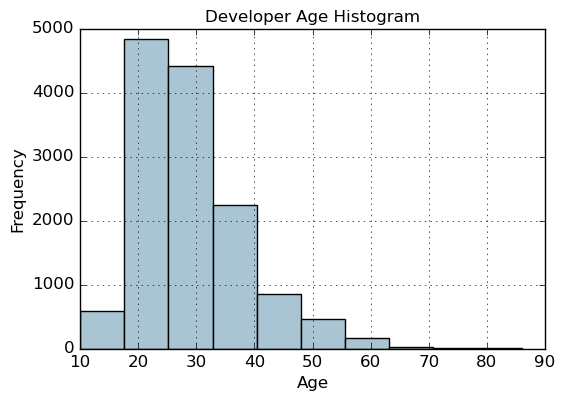

In [30]:
fig, ax = plt.subplots()
fcc_survey_df["Age"].hist(color="#A9C5D3")
ax.set_title("Developer Age Histogram", fontsize=12)
ax.set_xlabel("Age", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)

In [31]:
fcc_survey_df["Age_bin_round"] = np.array(np.floor(np.array(fcc_survey_df["Age"]) / 10.))
fcc_survey_df[["ID.x", "Age", "Age_bin_round"]].iloc[1071:1076]

,ID.x,Age,Age_bin_round
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0


In [35]:
bin_ranges = [0, 15, 30, 45, 60, 75, 100]
bin_names = [1, 2, 3, 4, 5, 6]

fcc_survey_df["Age_bin_custom_range"] = pd.cut(np.array(fcc_survey_df["Age"]), bins=bin_ranges)
fcc_survey_df["Age_bin_custom_label"] = pd.cut(np.array(fcc_survey_df["Age"]), bins=bin_ranges, labels=bin_names)

fcc_survey_df[["ID.x", "Age", "Age_bin_round", "Age_bin_custom_range", "Age_bin_custom_label"]].iloc[1071:1076]

,ID.x,Age,Age_bin_round,Age_bin_custom_range,Age_bin_custom_label
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0,"(15, 30]",2
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0,"(30, 45]",3
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0,"(15, 30]",2
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0,"(45, 60]",4
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0,"(30, 45]",3


Text(0, 0.5, 'Frequency')

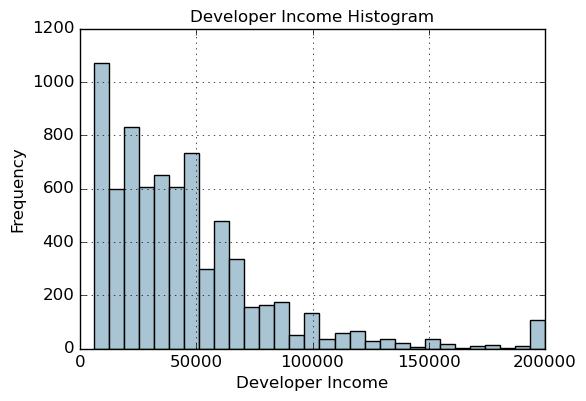

In [36]:
fig, ax = plt.subplots()
fcc_survey_df["Income"].hist(bins=30, color="#A9C5D3")
ax.set_title("Developer Income Histogram", fontsize=12)
ax.set_xlabel("Developer Income", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)

In [37]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = fcc_survey_df["Income"].quantile(quantile_list)
quantiles

0.00      6000.0
0.25     20000.0
0.50     37000.0
0.75     60000.0
1.00    200000.0
Name: Income, dtype: float64

Text(0, 0.5, 'Frequency')

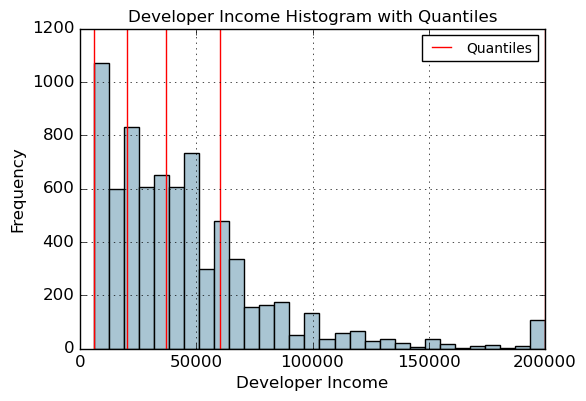

In [38]:
fig, ax = plt.subplots()
fcc_survey_df["Income"].hist(bins=30, color="#A9C5D3")

for quantile in quantiles:
    qvl = plt.axvline(quantile, color="r")
ax.legend([qvl], ["Quantiles"], fontsize=10)

ax.set_title("Developer Income Histogram with Quantiles", fontsize=12)
ax.set_xlabel("Developer Income", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)

In [40]:
quantile_labels = ["0-25Q", "25-50Q", "50-75Q", "75-100Q"]
fcc_survey_df["Income_quantile_range"] = pd.qcut(fcc_survey_df["Income"], q=quantile_list)
fcc_survey_df["Income_quantile_label"] = pd.qcut(fcc_survey_df["Income"], q=quantile_list, labels=quantile_labels)
fcc_survey_df[["ID.x", "Age", "Income", "Income_quantile_range", "Income_quantile_label"]].iloc[4:9]

,ID.x,Age,Income,Income_quantile_range,Income_quantile_label
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,"(5999.999, 20000.0]",0-25Q
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,"(37000.0, 60000.0]",50-75Q
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,"(20000.0, 37000.0]",25-50Q
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,"(37000.0, 60000.0]",50-75Q
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,"(60000.0, 200000.0]",75-100Q


In [41]:
fcc_survey_df["Income_log"] = np.log((1+fcc_survey_df["Income"]))
fcc_survey_df[["ID.x", "Age", "Income", "Income_log"]].iloc[4:9]

,ID.x,Age,Income,Income_log
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794


Text(11.5, 450, '$\\mu$=10.43')

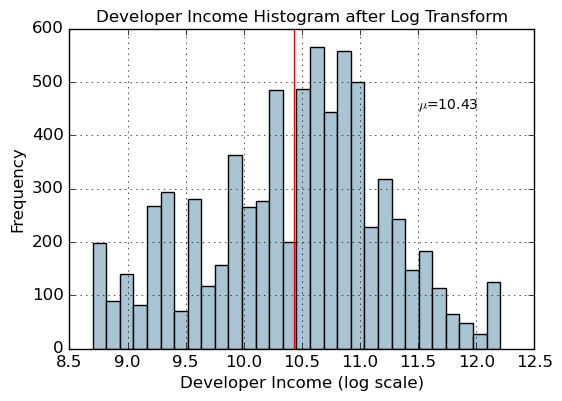

In [42]:
income_log_mean = np.round(np.mean(fcc_survey_df["Income_log"]), 2)

fig, ax = plt.subplots()
fcc_survey_df["Income_log"].hist(bins=30, color="#A9C5D3")
plt.axvline(income_log_mean, color="r")
ax.set_title("Developer Income Histogram after Log Transform", fontsize=12)
ax.set_xlabel("Developer Income (log scale)", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.text(11.5, 450, r"$\mu$="+str(income_log_mean), fontsize=10)

In [48]:
income = np.array(fcc_survey_df["Income"])
income_clean = income[~np.isnan(income)]
l, opt_lambda = spstats.boxcox(income_clean)

print("Optimal lambda value:", opt_lambda)

Optimal lambda value: 0.11799122497648248


In [49]:
fcc_survey_df["Income_box_lambda_0"] = spstats.boxcox((1+fcc_survey_df["Income"]), lmbda=0)
fcc_survey_df["Income_box_lambda_opt"] = spstats.boxcox((1+fcc_survey_df["Income"]), lmbda=opt_lambda)
fcc_survey_df[["ID.x", "Age", "Income", "Income_log", "Income_box_lambda_0", "Income_box_lambda_opt"]].iloc[4:9]

/home/francisco/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1042: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):


,ID.x,Age,Income,Income_log,Income_box_lambda_0,Income_box_lambda_opt
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681,8.699681,15.181132
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660,10.596660,21.115427
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522,10.373522,20.346524
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660,10.596660,21.115427
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794,11.289794,23.637176


Text(11.5, 450, '$\\mu$=20.65')

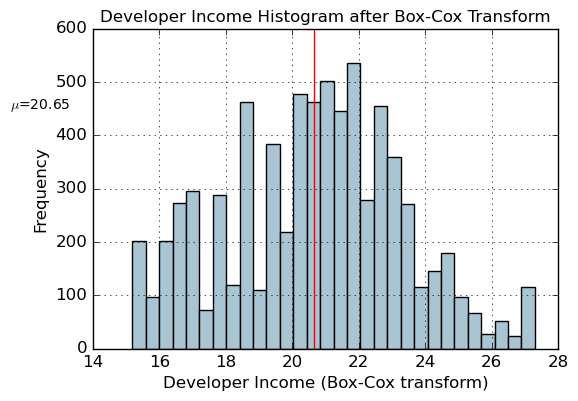

In [50]:
income_boxcox_mean = np.round(np.mean(fcc_survey_df["Income_box_lambda_opt"]),2)

fig, ax = plt.subplots()
fcc_survey_df["Income_box_lambda_opt"].hist(bins=30, color="#A9C5D3")
plt.axvline(income_boxcox_mean, color="r")
ax.set_title("Developer Income Histogram after Box-Cox Transform", fontsize=12)
ax.set_xlabel("Developer Income (Box-Cox transform)", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.text(11.5, 450, r"$\mu$="+str(income_boxcox_mean), fontsize=10)